<a href="https://colab.research.google.com/github/Aomaphisara/ULckdresearch2023/blob/main/K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.10.12


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/ckd/data.csv")
df.head()

,Unnamed: 0,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,time_t1,eGFR_t1,VisitLocation,...,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation,Group,Fold,TimeDiff
0,1,2299,3386255,-7.158596,0,1,0,2017-10-03 09:19:55,63.60,0,...,5.284,215.0,81.0,123.0,99.0,21.019,1,0,1,0.000000
1,3,2299,4546471,5.550691,0,1,0,2018-12-12 09:18:50,70.20,0,...,5.755,219.0,64.0,146.0,73.0,15.198,1,1,1,1.131507
2,2,2299,5812902,-6.063710,0,1,0,2019-12-19 09:51:24,64.02,0,...,5.300,193.0,62.0,129.0,65.0,30.879,1,0,1,1.191781
3,0,2299,6947220,-12.812245,0,1,0,2021-03-04 10:01:42,48.54,0,...,5.562,205.0,69.0,139.0,76.0,36.916,1,0,1,1.016438
4,4,2299,8186767,28.287500,0,1,0,2022-04-21 08:45:55,80.47,0,...,5.500,198.0,74.0,129.0,60.0,28.684,1,1,1,1.208219


ตัวแปรที่นำออก มี 6 ตัวแปร คือ  'eGFR_t1', 'L1-eGFR', 'Slopes', 'eGFR_t1', 'TimeDiff','L1-eGFR'

ตัวแปรที่นำไปทำการ scale

In [ ]:
select_columns = [ 'Age', 'BMI',  'BSA', 'Diastolic-BP', 'Systolic-BP',
    'G1M2-ARB', 'G3M1-Statin',
       'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
    'D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy',
   'L2-BUN', 'L3-Creatinine',
       'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio']
select_columns = df[select_columns]

In [ ]:
select_columns.head()

,Age,BMI,BSA,Diastolic-BP,Systolic-BP,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,...,L13-Hematocrit,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio
0,73,20.80,1.39,75.0,127.0,90,0,0,0,0,...,39.367,4.9248,194.24,91.0,5.284,215.0,81.0,123.0,99.0,21.019
1,74,20.27,1.38,64.0,105.0,90,90,0,0,0,...,41.270,5.1634,251.46,86.0,5.755,219.0,64.0,146.0,73.0,15.198
2,75,20.72,1.38,76.0,138.0,100,100,34,0,0,...,32.400,9.4100,313.00,100.0,5.300,193.0,62.0,129.0,65.0,30.879
3,76,20.27,1.36,66.0,134.0,35,0,1,35,0,...,39.053,4.3718,204.65,89.0,5.562,205.0,69.0,139.0,76.0,36.916
4,78,19.05,1.33,57.0,103.0,100,0,15,0,0,...,34.600,5.4200,434.00,88.0,5.500,198.0,74.0,129.0,60.0,28.684


Feature Scaling (Standard Scaler)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(select_columns)
scale_data = pd.DataFrame(scaled_data, columns=select_columns.columns)

In [ ]:
scale_data.head()

,Age,BMI,BSA,Diastolic-BP,Systolic-BP,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,...,L13-Hematocrit,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio
0,0.531249,-1.055973,-1.625472,0.160130,-0.525000,2.991739,-0.698699,-0.129510,-0.176477,-0.333859,...,0.254801,-1.034716,-0.702862,-0.599634,-0.882880,0.965478,-0.803614,0.321723,3.686025,-1.158713
1,0.617111,-1.201074,-1.686392,-0.793624,-1.800103,2.991739,1.392719,-0.129510,-0.176477,-0.333859,...,0.633855,-0.929884,0.060103,-0.701268,-0.546254,1.063652,-1.038268,0.983545,1.640595,-1.258996
2,0.702974,-1.077875,-1.686392,0.246834,0.112551,3.360578,1.625099,4.073425,-0.176477,-0.333859,...,-1.132941,0.935901,0.880671,-0.416694,-0.871445,0.425522,-1.065875,0.494372,1.011232,-0.988847
3,0.788837,-1.201074,-1.808232,-0.620214,-0.119286,0.963126,-0.698699,-0.005894,2.205286,-0.333859,...,0.192256,-1.277681,-0.564056,-0.640287,-0.684192,0.720043,-0.969252,0.782121,1.876606,-0.884842
4,0.960563,-1.535080,-1.990992,-1.400558,-1.916021,3.360578,-0.698699,1.724726,-0.176477,-0.333859,...,-0.694728,-0.817145,2.494071,-0.660614,-0.728504,0.548239,-0.900236,0.494372,0.617880,-1.026662


In [ ]:
additional_columns = df[['InPatient', 'OutPatient', 'Emergency', 'VisitLocation', 'LabLocation', 'NATNL', 'Sex']]
scale_data = pd.concat([scale_data, additional_columns], axis=1)

In [ ]:
scale_data.head()

,Age,BMI,BSA,Diastolic-BP,Systolic-BP,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,...,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,InPatient,OutPatient,Emergency,VisitLocation,LabLocation,NATNL,Sex
0,0.531249,-1.055973,-1.625472,0.160130,-0.525000,2.991739,-0.698699,-0.129510,-0.176477,-0.333859,...,0.321723,3.686025,-1.158713,0,1,0,0,1,0,1
1,0.617111,-1.201074,-1.686392,-0.793624,-1.800103,2.991739,1.392719,-0.129510,-0.176477,-0.333859,...,0.983545,1.640595,-1.258996,0,1,0,0,1,0,1
2,0.702974,-1.077875,-1.686392,0.246834,0.112551,3.360578,1.625099,4.073425,-0.176477,-0.333859,...,0.494372,1.011232,-0.988847,0,1,0,0,1,0,1
3,0.788837,-1.201074,-1.808232,-0.620214,-0.119286,0.963126,-0.698699,-0.005894,2.205286,-0.333859,...,0.782121,1.876606,-0.884842,0,1,0,0,1,0,1
4,0.960563,-1.535080,-1.990992,-1.400558,-1.916021,3.360578,-0.698699,1.724726,-0.176477,-0.333859,...,0.494372,0.617880,-1.026662,0,1,0,0,1,0,1


ตัวแปรทั้งหมดที่ใช้ในการจัดกลุ่ม มีทั้งหมด 73 ตัวแปร

In [ ]:
scale_data.columns

Index(['Age', 'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP', 'G1M2-ARB',
       'G3M1-Statin', 'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent', 'D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy', 'L2-BUN', 'L3-Creatinine', 'L4-Sodium',
      

#จัดกลุ่ม 3 กลุ่มโดยอิงตาม slope

In [ ]:
from sklearn.cluster import KMeans
slope_k3 = scale_data.copy()
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(slope_k3)
slope_k3['3-Cluster-slope']=kmeans.labels_
slope_k3.head()

,Age,BMI,BSA,Diastolic-BP,Systolic-BP,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,...,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,InPatient,OutPatient,Emergency,VisitLocation,LabLocation,NATNL,Sex,3-Cluster-slope
0,0.531249,-1.055973,-1.625472,0.160130,-0.525000,2.991739,-0.698699,-0.129510,-0.176477,-0.333859,...,3.686025,-1.158713,0,1,0,0,1,0,1,1
1,0.617111,-1.201074,-1.686392,-0.793624,-1.800103,2.991739,1.392719,-0.129510,-0.176477,-0.333859,...,1.640595,-1.258996,0,1,0,0,1,0,1,1
2,0.702974,-1.077875,-1.686392,0.246834,0.112551,3.360578,1.625099,4.073425,-0.176477,-0.333859,...,1.011232,-0.988847,0,1,0,0,1,0,1,1
3,0.788837,-1.201074,-1.808232,-0.620214,-0.119286,0.963126,-0.698699,-0.005894,2.205286,-0.333859,...,1.876606,-0.884842,0,1,0,0,1,0,1,1
4,0.960563,-1.535080,-1.990992,-1.400558,-1.916021,3.360578,-0.698699,1.724726,-0.176477,-0.333859,...,0.617880,-1.026662,0,1,0,0,1,0,1,1


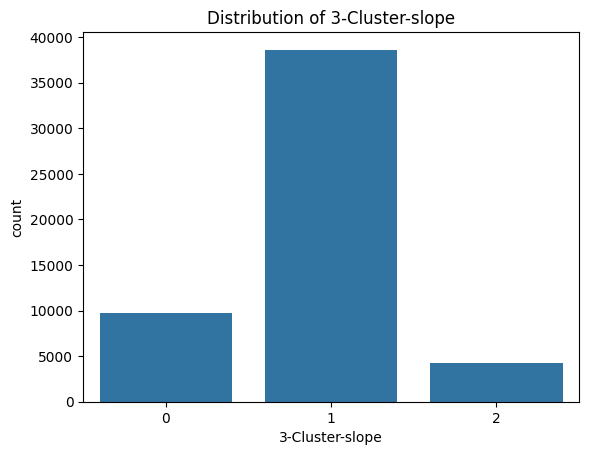

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'slope_k3' is your DataFrame
sns.countplot(x='3-Cluster-slope', data=slope_k3)
plt.title('Distribution of 3-Cluster-slope')
plt.show()


In [ ]:
result = pd.concat([select_columns, slope_k3[['InPatient', 'OutPatient', 'Emergency', 'VisitLocation', 'LabLocation', 'NATNL', 'Sex', '3-Cluster-slope']]], axis=1)
result.head()

,Age,BMI,BSA,Diastolic-BP,Systolic-BP,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,...,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,InPatient,OutPatient,Emergency,VisitLocation,LabLocation,NATNL,Sex,3-Cluster-slope
0,73,20.80,1.39,75.0,127.0,90,0,0,0,0,...,99.0,21.019,0,1,0,0,1,0,1,1
1,74,20.27,1.38,64.0,105.0,90,90,0,0,0,...,73.0,15.198,0,1,0,0,1,0,1,1
2,75,20.72,1.38,76.0,138.0,100,100,34,0,0,...,65.0,30.879,0,1,0,0,1,0,1,1
3,76,20.27,1.36,66.0,134.0,35,0,1,35,0,...,76.0,36.916,0,1,0,0,1,0,1,1
4,78,19.05,1.33,57.0,103.0,100,0,15,0,0,...,60.0,28.684,0,1,0,0,1,0,1,1


In [ ]:
cluster1_slope = result[result['3-Cluster-slope'] == 0]
cluster2_slope = result[result['3-Cluster-slope'] == 1]
cluster3_slope = result[result['3-Cluster-slope'] == 2]

In [ ]:
#cluster1_slope.to_csv('/content/drive/MyDrive/ckd/cluster1_slope.csv', index=False)
#cluster2_slope.to_csv('/content/drive/MyDrive/ckd/cluster2_slope.csv', index=False)
#cluster3_slope.to_csv('/content/drive/MyDrive/ckd/cluster3_slope.csv', index=False)

#จัดกลุ่ม 5 กลุ่ม โดยอิงตาม stage

In [ ]:
from sklearn.cluster import KMeans
stage_k5 = scale_data.copy()
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(stage_k5)
stage_k5['5-Cluster-stage']=kmeans.labels_
stage_k5.head()

,Age,BMI,BSA,Diastolic-BP,Systolic-BP,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,...,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,InPatient,OutPatient,Emergency,VisitLocation,LabLocation,NATNL,Sex,5-Cluster-stage
0,0.531249,-1.055973,-1.625472,0.160130,-0.525000,2.991739,-0.698699,-0.129510,-0.176477,-0.333859,...,3.686025,-1.158713,0,1,0,0,1,0,1,1
1,0.617111,-1.201074,-1.686392,-0.793624,-1.800103,2.991739,1.392719,-0.129510,-0.176477,-0.333859,...,1.640595,-1.258996,0,1,0,0,1,0,1,1
2,0.702974,-1.077875,-1.686392,0.246834,0.112551,3.360578,1.625099,4.073425,-0.176477,-0.333859,...,1.011232,-0.988847,0,1,0,0,1,0,1,1
3,0.788837,-1.201074,-1.808232,-0.620214,-0.119286,0.963126,-0.698699,-0.005894,2.205286,-0.333859,...,1.876606,-0.884842,0,1,0,0,1,0,1,1
4,0.960563,-1.535080,-1.990992,-1.400558,-1.916021,3.360578,-0.698699,1.724726,-0.176477,-0.333859,...,0.617880,-1.026662,0,1,0,0,1,0,1,1


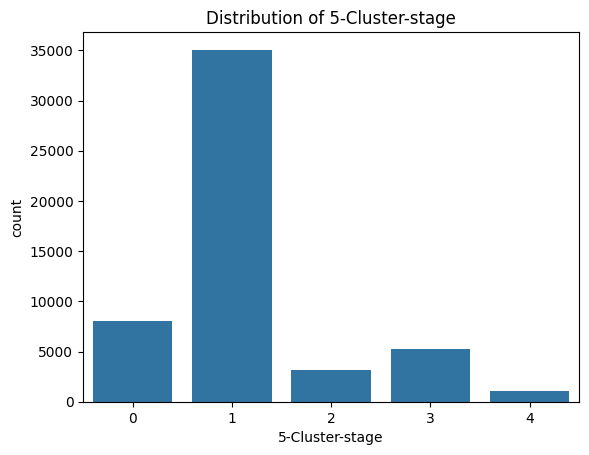

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='5-Cluster-stage', data=stage_k5)
plt.title('Distribution of 5-Cluster-stage')
plt.show()


In [ ]:
result1 = pd.concat([select_columns, stage_k5[['InPatient', 'OutPatient', 'Emergency', 'VisitLocation', 'LabLocation', 'NATNL', 'Sex', '5-Cluster-stage']]], axis=1)
result1.head()

,Age,BMI,BSA,Diastolic-BP,Systolic-BP,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,...,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,InPatient,OutPatient,Emergency,VisitLocation,LabLocation,NATNL,Sex,5-Cluster-stage
0,73,20.80,1.39,75.0,127.0,90,0,0,0,0,...,99.0,21.019,0,1,0,0,1,0,1,1
1,74,20.27,1.38,64.0,105.0,90,90,0,0,0,...,73.0,15.198,0,1,0,0,1,0,1,1
2,75,20.72,1.38,76.0,138.0,100,100,34,0,0,...,65.0,30.879,0,1,0,0,1,0,1,1
3,76,20.27,1.36,66.0,134.0,35,0,1,35,0,...,76.0,36.916,0,1,0,0,1,0,1,1
4,78,19.05,1.33,57.0,103.0,100,0,15,0,0,...,60.0,28.684,0,1,0,0,1,0,1,1


In [ ]:
cluster1_stage = result1[result1['5-Cluster-stage'] == 0]
cluster2_stage = result1[result1['5-Cluster-stage'] == 1]
cluster3_stage = result1[result1['5-Cluster-stage'] == 2]
cluster4_stage = result1[result1['5-Cluster-stage'] == 3]
cluster5_stage = result1[result1['5-Cluster-stage'] == 4]

In [ ]:
#cluster1_stage.to_csv('/content/drive/MyDrive/ckd/cluster1_stage.csv', index=False)
#cluster2_stage.to_csv('/content/drive/MyDrive/ckd/cluster2_stage.csv', index=False)
#cluster3_stage.to_csv('/content/drive/MyDrive/ckd/cluster3_stage.csv', index=False)
#cluster4_stage.to_csv('/content/drive/MyDrive/ckd/cluster4_stage.csv', index=False)
#cluster5_stage.to_csv('/content/drive/MyDrive/ckd/cluster5_stage.csv', index=False)

#TSNE

<ipython-input-60-b13e840fd730>:17: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),


[Text(0.5, 1.0, '3 Cluster by Slope T-SNE')]

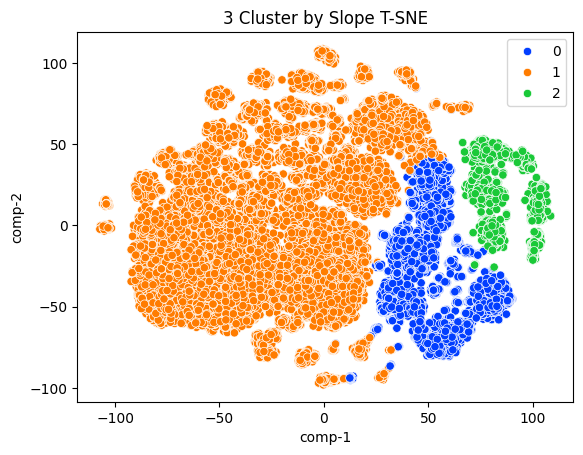

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd

# Assuming stage_k5 is your DataFrame
y = slope_k3['3-Cluster-slope']
X = slope_k3.drop(['3-Cluster-slope'], axis=1)
tsne_slope_k3 = TSNE(n_components=2, perplexity=40, random_state=42).fit_transform(X)

df = pd.DataFrame()
df["y"] = y
df["comp-1"] =tsne_slope_k3[:, 0]
df["comp-2"] = tsne_slope_k3[:, 1]

# Use Seaborn for scatter plot
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("bright", 5),
                data=df).set(title="3 Cluster by Slope T-SNE")


[Text(0.5, 1.0, '5 Cluster by Stage T-SNE')]

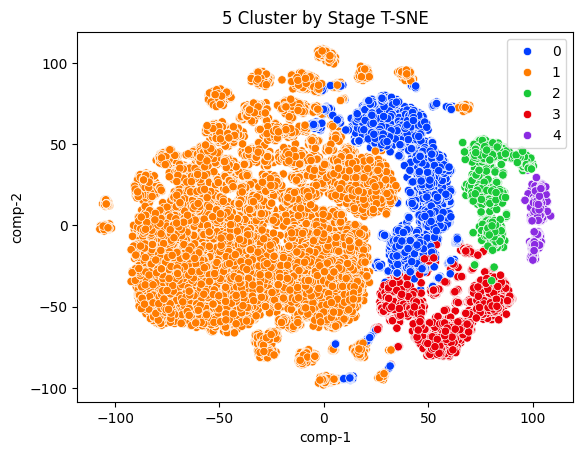

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd

# Assuming stage_k5 is your DataFrame
y = stage_k5['5-Cluster-stage']
X = stage_k5.drop(['5-Cluster-stage'], axis=1)
tsne_stage_k5= TSNE(n_components=2, perplexity=40, random_state=42).fit_transform(X)

df = pd.DataFrame()
df["y"] = y
df["comp-1"] =tsne_stage_k5[:, 0]
df["comp-2"] = tsne_stage_k5[:, 1]

# Use Seaborn for scatter plot
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("bright", 5),
                data=df).set(title="5 Cluster by Stage T-SNE")